In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings

import numpy as np

In [3]:
order_df=pd.read_parquet('tezcatli_orders_data.parquet')
dodge_df=pd.read_excel('Housing Starts Analytics.xlsx')

In [5]:
dodge_df=dodge_df[dodge_df['Housing Type']!='High']

,Calendar - Year,Calendar - Quarter,Region Name,Housing Type,Units
0,1999,Q1,Alaska,Detached,497.000000
1,1999,Q1,Alaska,Low,158.000000
2,1999,Q1,Canada East,Detached,7023.370000
3,1999,Q1,Canada East,Low,7745.760000
5,1999,Q1,Canada West,Detached,3852.920000
...,...,...,...,...,...
5027,2027,Q4,Southeast,Low,16816.329547
5029,2027,Q4,Southwest,Detached,26659.537030
5030,2027,Q4,Southwest,Low,9993.163775
5032,2027,Q4,Texas and South Plains,Detached,45063.518010


In [4]:
order_df['Order Create Date']=pd.to_datetime(order_df['Order Create Date'])
order_df=order_df.loc[order_df['Region Name']!='Export/Interco']
order_df=order_df.loc[order_df['Product Segment'].isin(['Exterior','Interior'])]
order_df=order_df[[ 'Order Create Date',
       'Region Name', 'District Name', 'forecast_group', 'Order Volume (STD)']]

order_df['year'] = order_df['Order Create Date'].dt.year
order_df['month'] = order_df['Order Create Date'].dt.month
order_df=order_df.sort_values(by='Order Create Date').reset_index(drop=True)

In [5]:
forecast_group='Pr Plk'
order_df_filter=order_df.loc[order_df['forecast_group']=='Pr Plk']
# order_df_filter=order_df_filter.groupby(['Calendar Year','Region Name','District Name'])['Order Volume (STD)'].sum().reset_index()

In [11]:
order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'

/tmp/ipykernel_30626/3166445845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'


In [16]:
order_df_filter=order_df_filter.groupby(['date','Region Name'])['Order Volume (STD)'].sum().reset_index()

In [17]:
# dodge_df
dodge_df['Calendar - Quarter'].replace({'Q1':'-01-','Q2':'-04-','Q3':'-07-','Q4':'-10-'},inplace=True)

In [19]:
dodge_df['Order Create Date']=dodge_df['Calendar - Year'].astype('str') + dodge_df['Calendar - Quarter'] + '01'

In [21]:
# pd.date_range(start='1999-01',end='2024-12',freq='ms')
start_date = "1999-01-01"
end_date = "2024-01-01"
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

In [22]:
dodge_df_date=pd.DataFrame()
dodge_df_date['Order Create Date']=date_range

In [23]:
dodge_df['Order Create Date']=pd.to_datetime(dodge_df['Order Create Date'])

In [32]:
dodge_df=dodge_df.groupby(['Order Create Date','Region Name'])['Units'].sum().reset_index() # done

In [60]:
dodge_df=dodge_df_date.merge(dodge_df,on='Order Create Date',how='left') # done

In [63]:
region='Carolinas'
dodge_df=dodge_df.loc[dodge_df['Region Name']==region]  # done

In [65]:
start_date = "1999-01-01"
end_date = "2024-01-01"

date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
dodge_df_date=pd.DataFrame()
dodge_df_date['Order Create Date']=date_range
dodge_df_date=dodge_df_date.merge(dodge_df,on='Order Create Date',how='left')  # done

In [68]:
dodge_df_date['Units']=dodge_df_date['Units']/3 # done

In [75]:
dodge_df_date=dodge_df_date.fillna(method='ffill')

In [81]:
order_df_filter['Order Create Date']=pd.to_datetime(order_df_filter['date']) # done

In [93]:
merge_df=order_df_filter.merge(dodge_df_date,on=['Order Create Date','Region Name'],how='left') # done

                    Order Volume (STD)     Units
Order Volume (STD)            1.000000  0.804109
Units                         0.804109  1.000000 Carolinas


/tmp/ipykernel_30626/3941774660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


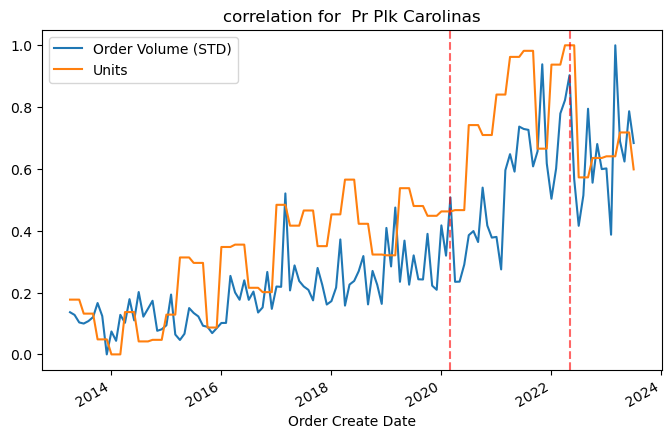

In [97]:
print((merge_df.loc[merge_df['Region Name']==region].corr()),region)
ax=merge_df.loc[merge_df['Region Name']==region].set_index('Order Create Date')[['Order Volume (STD)','Units']].apply(lambda x:(x-x.min())/(x.max()-x.min())).plot(figsize=(8,5),title=f'correlation for  {forecast_group} {region}')
ax.axvline(x='2020-03-01',color='red', alpha = 0.6,linestyle='dashed')
ax.axvline(x='2022-05-01',color='red', alpha = 0.6,linestyle='dashed')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Adjust the rotation angle as needed
plt.show()

In [98]:
################################################################  new function  #####################################

/tmp/ipykernel_14309/129143021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_14309/129143021.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


                    Order Volume (STD)    Units
Order Volume (STD)             1.00000  0.74572
Units                          0.74572  1.00000 Carolinas


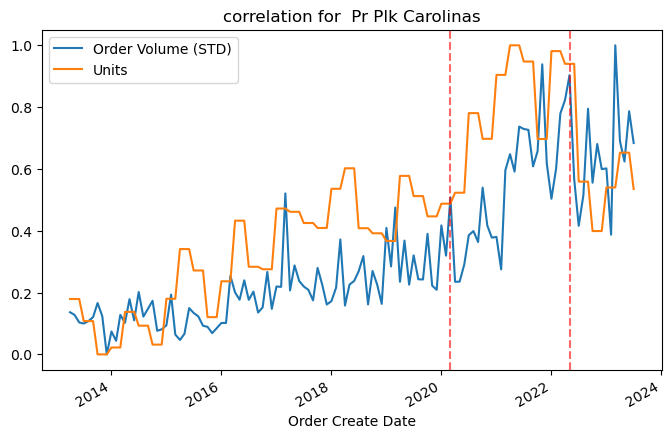

/tmp/ipykernel_14309/129143021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_14309/129143021.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


                    Order Volume (STD)     Units
Order Volume (STD)            1.000000  0.383121
Units                         0.383121  1.000000 Canada East


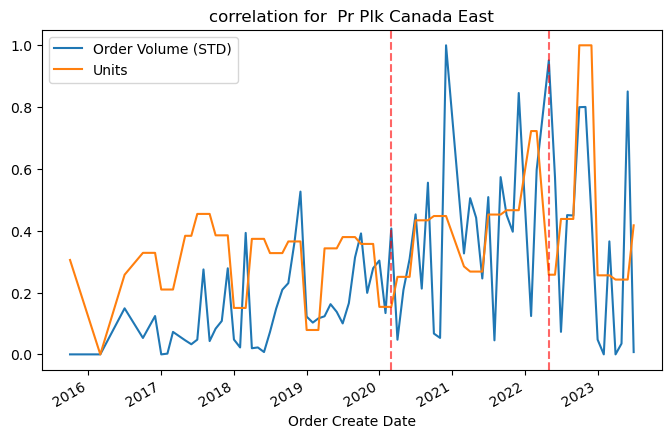

/tmp/ipykernel_14309/129143021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_14309/129143021.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


                    Order Volume (STD)     Units
Order Volume (STD)            1.000000  0.074516
Units                         0.074516  1.000000 Canada West


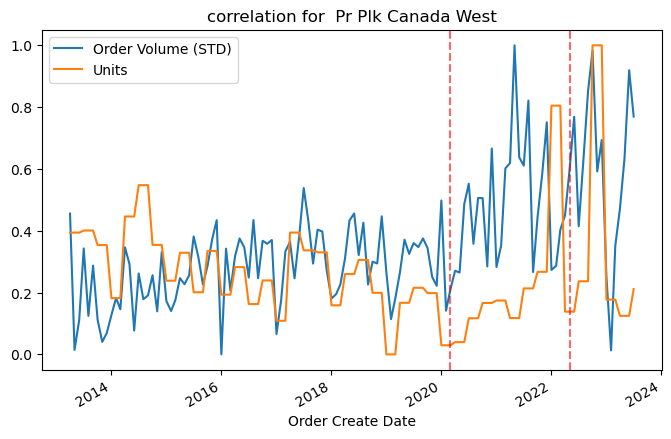

/tmp/ipykernel_14309/129143021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_14309/129143021.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


                    Order Volume (STD)     Units
Order Volume (STD)            1.000000  0.292903
Units                         0.292903  1.000000 Mid Atlantic


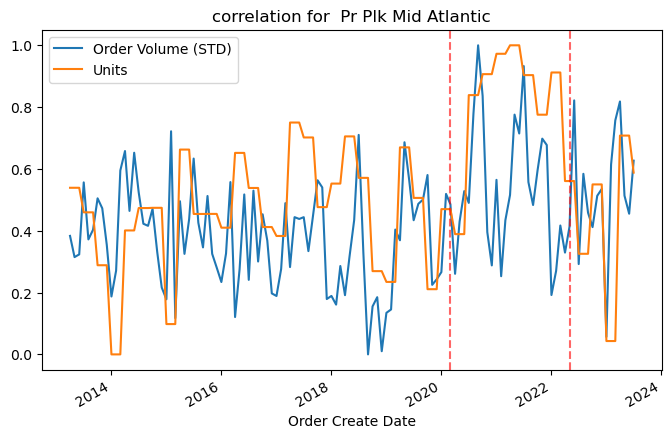

/tmp/ipykernel_14309/129143021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_14309/129143021.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


                    Order Volume (STD)     Units
Order Volume (STD)            1.000000  0.567464
Units                         0.567464  1.000000 Mid South


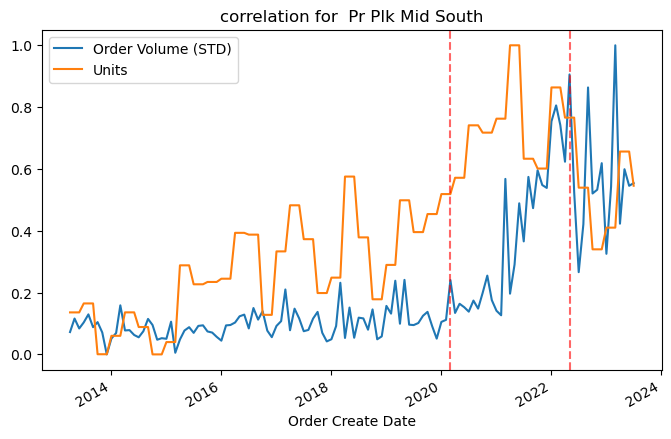

/tmp/ipykernel_14309/129143021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_14309/129143021.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


                    Order Volume (STD)     Units
Order Volume (STD)            1.000000  0.276835
Units                         0.276835  1.000000 Midwest Central


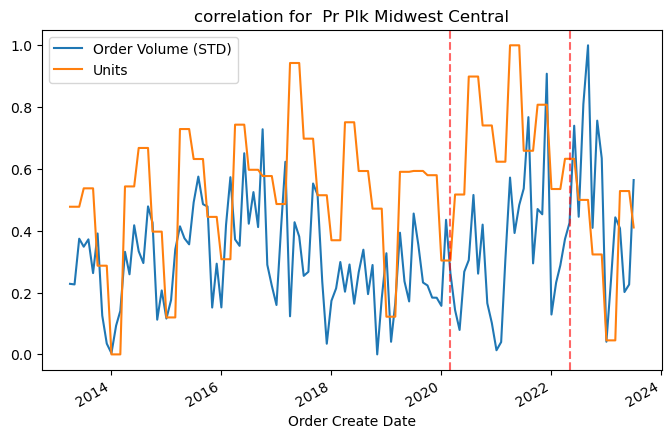

/tmp/ipykernel_14309/129143021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_14309/129143021.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


                    Order Volume (STD)     Units
Order Volume (STD)            1.000000  0.366758
Units                         0.366758  1.000000 Midwest East


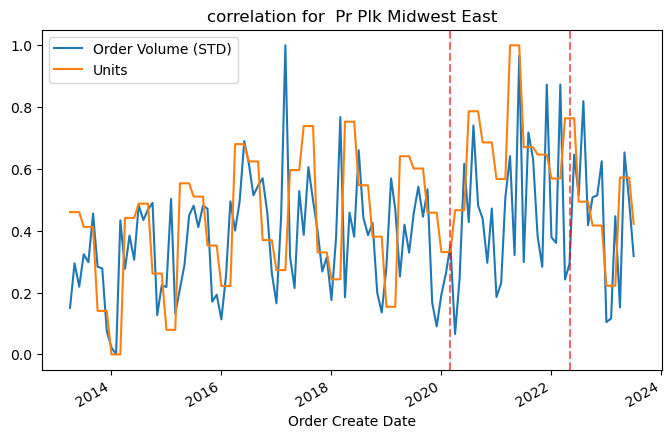

/tmp/ipykernel_14309/129143021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_14309/129143021.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


                    Order Volume (STD)     Units
Order Volume (STD)            1.000000  0.193736
Units                         0.193736  1.000000 Midwest West


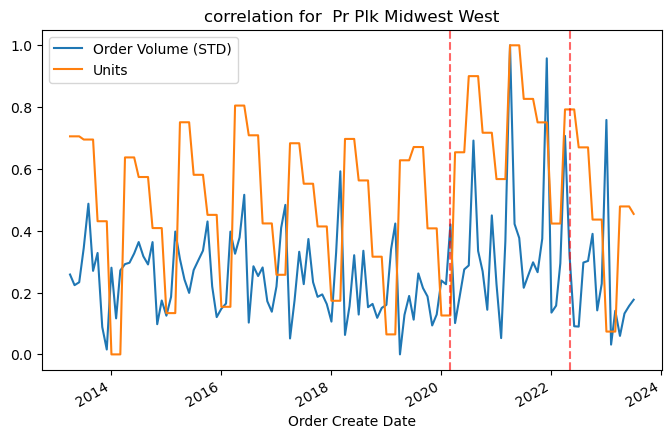

/tmp/ipykernel_14309/129143021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_14309/129143021.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


                    Order Volume (STD)     Units
Order Volume (STD)            1.000000  0.571758
Units                         0.571758  1.000000 Mountain


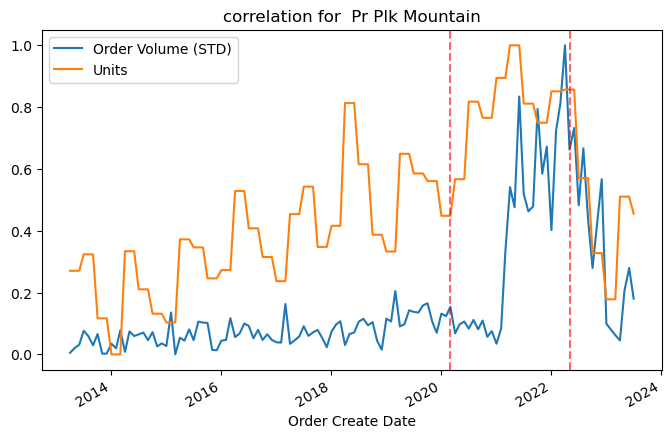

/tmp/ipykernel_14309/129143021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_14309/129143021.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


                    Order Volume (STD)     Units
Order Volume (STD)            1.000000  0.394345
Units                         0.394345  1.000000 North Atlantic


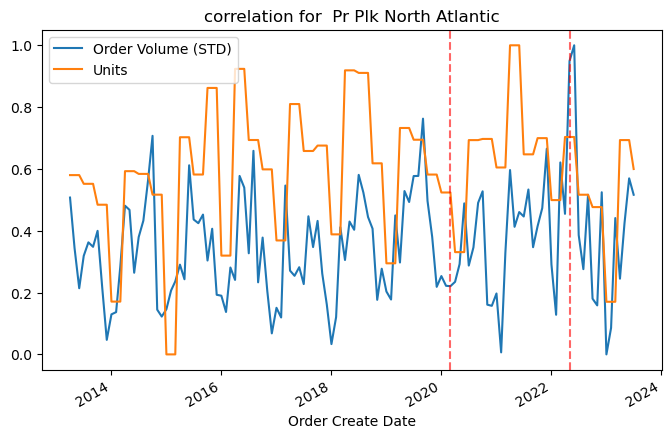

/tmp/ipykernel_14309/129143021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_14309/129143021.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


                    Order Volume (STD)     Units
Order Volume (STD)            1.000000  0.335784
Units                         0.335784  1.000000 Pacific Northwest


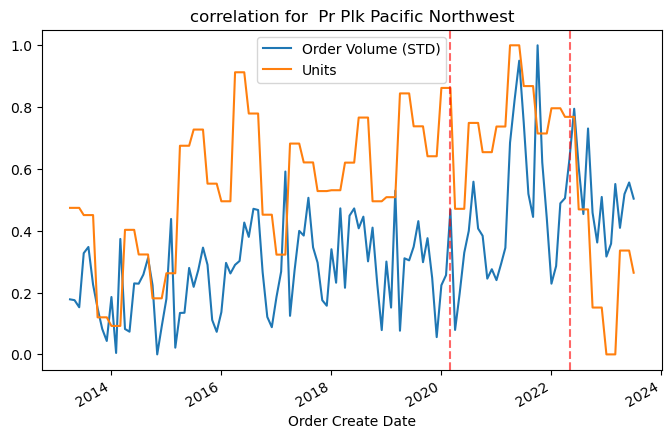

/tmp/ipykernel_14309/129143021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_14309/129143021.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


                    Order Volume (STD)     Units
Order Volume (STD)            1.000000  0.779645
Units                         0.779645  1.000000 Southeast


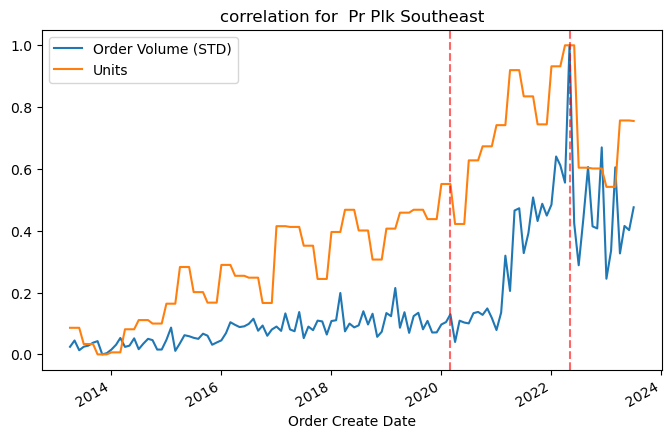

/tmp/ipykernel_14309/129143021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_14309/129143021.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


                    Order Volume (STD)     Units
Order Volume (STD)            1.000000  0.458724
Units                         0.458724  1.000000 Southwest


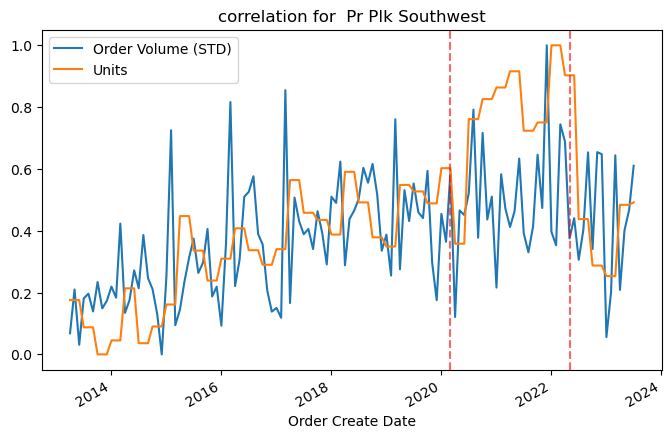

/tmp/ipykernel_14309/129143021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_14309/129143021.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


                    Order Volume (STD)    Units
Order Volume (STD)             1.00000  0.65144
Units                          0.65144  1.00000 Texas and South Plains


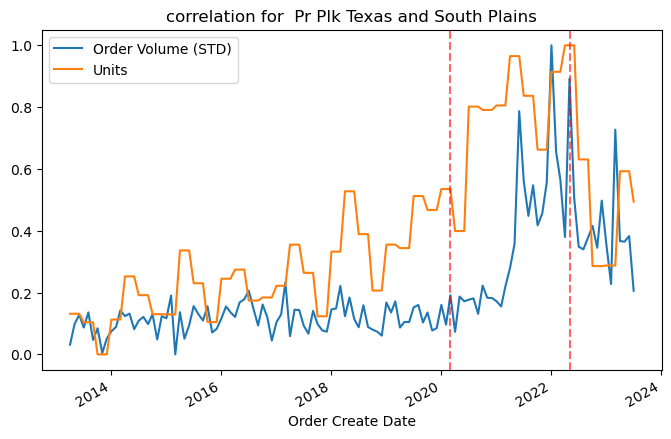

                    Order Volume (STD)  Units
Order Volume (STD)                 NaN    NaN
Units                              NaN    NaN Alaska


/tmp/ipykernel_14309/129143021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_14309/129143021.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


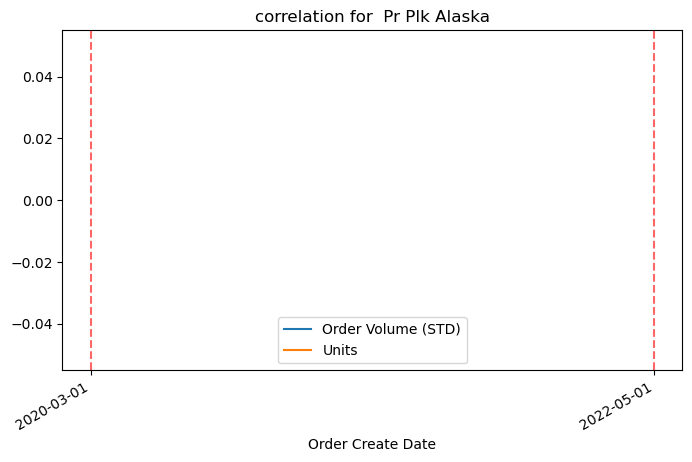

In [6]:
order_df=pd.read_parquet('tezcatli_orders_data.parquet')

order_df['Order Create Date']=pd.to_datetime(order_df['Order Create Date'])
order_df=order_df.loc[order_df['Region Name']!='Export/Interco']
order_df=order_df.loc[order_df['Product Segment'].isin(['Exterior','Interior'])]
order_df=order_df[[ 'Order Create Date',
       'Region Name', 'District Name', 'forecast_group', 'Order Volume (STD)']]

for i in order_df['Region Name'].unique():
       region=i
       dodge_df=pd.read_excel('Housing Starts Analytics.xlsx')
       dodge_df=dodge_df[dodge_df['Housing Type']!='High']
       order_df['year'] = order_df['Order Create Date'].dt.year
       order_df['month'] = order_df['Order Create Date'].dt.month
       order_df=order_df.sort_values(by='Order Create Date').reset_index(drop=True)
       forecast_group='Pr Plk'
       order_df_filter=order_df.loc[order_df['forecast_group']=='Pr Plk']
       # order_df_filter=order_df_filter.groupby(['Calendar Year','Region Name','District Name'])['Order Volume (STD)'].sum().reset_index()
       order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
       order_df_filter=order_df_filter.groupby(['date','Region Name'])['Order Volume (STD)'].sum().reset_index()
       # dodge_df    
       dodge_df['Calendar - Quarter'].replace({'Q1':'-01-','Q2':'-04-','Q3':'-07-','Q4':'-10-'},inplace=True)
       dodge_df['Order Create Date']=dodge_df['Calendar - Year'].astype('str') + dodge_df['Calendar - Quarter'] + '01'
       # pd.date_range(start='1999-01',end='2024-12',freq='ms')
       start_date = "1999-01-01"
       end_date = "2024-01-01"
       date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
       dodge_df_date=pd.DataFrame()
       dodge_df_date['Order Create Date']=date_range
       dodge_df['Order Create Date']=pd.to_datetime(dodge_df['Order Create Date'])
       dodge_df=dodge_df.groupby(['Order Create Date','Region Name'])['Units'].sum().reset_index()
       dodge_df=dodge_df_date.merge(dodge_df,on='Order Create Date',how='left')
       dodge_df=dodge_df.loc[dodge_df['Region Name']==region]
       start_date = "1999-01-01"
       end_date = "2024-01-01"

       date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
       dodge_df_date=pd.DataFrame()
       dodge_df_date['Order Create Date']=date_range
       dodge_df_date=dodge_df_date.merge(dodge_df,on='Order Create Date',how='left')
       dodge_df_date['Units']=dodge_df_date['Units']/3 # done
       dodge_df_date=dodge_df_date.fillna(method='ffill')
       order_df_filter['Order Create Date']=pd.to_datetime(order_df_filter['date'])
       merge_df=order_df_filter.merge(dodge_df_date,on=['Order Create Date','Region Name'],how='left')

       print((merge_df.loc[merge_df['Region Name']==region].corr()),region)
       ax=merge_df.loc[merge_df['Region Name']==region].set_index('Order Create Date')[['Order Volume (STD)','Units']].apply(lambda x:(x-x.min())/(x.max()-x.min())).plot(figsize=(8,5),title=f'correlation for  {forecast_group} {region}')
       ax.axvline(x='2020-03-01',color='red', alpha = 0.6,linestyle='dashed')
       ax.axvline(x='2022-05-01',color='red', alpha = 0.6,linestyle='dashed')
       # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Adjust the rotation angle as needed
       plt.show()

In [167]:
######################################################################### rr data

In [232]:

rr_data=pd.read_csv('r&r.csv')

rr_data=rr_data.drop(['District','District Number','Sub Division','Division'],axis=1)
rr_data['Order Create Date']=pd.to_datetime(rr_data['Calendar Year'])
# region='Midwest Central'
# rr_data=rr_data.loc[rr_data['Region Name']==region]

In [234]:
rr_data['Region Name'].unique()

array(['Midwest Central', 'Midwest East', 'Midwest West', 'Mid Atlantic',
       'North Atlantic', 'Carolinas', 'Mid South', 'Southeast',
       'Texas and South Plains', 'Alaska', 'Mountain',
       'Pacific Northwest', 'Southwest'], dtype=object)

In [238]:
rr_data

,Region Name,District Name,Calendar Year,Project Count,Order Create Date
0,Midwest Central,Chicago,2004Q1,50916,2004-01-01
1,Midwest Central,Chicago,2004Q2,51747,2004-04-01
2,Midwest Central,Chicago,2004Q3,52751,2004-07-01
3,Midwest Central,Chicago,2004Q4,53886,2004-10-01
4,Midwest Central,Chicago,2005Q1,55047,2005-01-01
...,...,...,...,...,...
3951,Southwest,Southern California,2025Q4,113291,2025-10-01
3952,Southwest,Southern California,2026Q1,115812,2026-01-01
3953,Southwest,Southern California,2026Q2,116332,2026-04-01
3954,Southwest,Southern California,2026Q3,116912,2026-07-01


In [239]:
start_date = "2004-01-01"
end_date = "2024-01-01"
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
rr_df_date=pd.DataFrame()
rr_df_date['Order Create Date']=date_range

In [240]:
rr_df_date

,Order Create Date
0,2004-01-01
1,2004-02-01
2,2004-03-01
3,2004-04-01
4,2004-05-01
...,...
236,2023-09-01
237,2023-10-01
238,2023-11-01
239,2023-12-01


In [241]:
rr_data

,Region Name,District Name,Calendar Year,Project Count,Order Create Date
0,Midwest Central,Chicago,2004Q1,50916,2004-01-01
1,Midwest Central,Chicago,2004Q2,51747,2004-04-01
2,Midwest Central,Chicago,2004Q3,52751,2004-07-01
3,Midwest Central,Chicago,2004Q4,53886,2004-10-01
4,Midwest Central,Chicago,2005Q1,55047,2005-01-01
...,...,...,...,...,...
3951,Southwest,Southern California,2025Q4,113291,2025-10-01
3952,Southwest,Southern California,2026Q1,115812,2026-01-01
3953,Southwest,Southern California,2026Q2,116332,2026-04-01
3954,Southwest,Southern California,2026Q3,116912,2026-07-01


In [242]:
rr_data=rr_df_date.merge(rr_data,how='left',on=['Order Create Date'])

In [246]:
rr_data

,Order Create Date,Region Name,District Name,Calendar Year,Project Count
0,2004-01-01,Midwest Central,Chicago,2004Q1,16972.000000
1,2004-01-01,Midwest Central,Kansas,2004Q1,5862.333333
2,2004-01-01,Midwest Central,Missouri,2004Q1,10531.666667
3,2004-01-01,Midwest Central,Wisconsin,2004Q1,9186.333333
4,2004-01-01,Midwest East,Indiana,2004Q1,6976.333333
...,...,...,...,...,...
3638,2024-01-01,Pacific Northwest,Washington,2024Q1,13420.000000
3639,2024-01-01,Southwest,Desert,2024Q1,27369.000000
3640,2024-01-01,Southwest,Las Vegas,2024Q1,5071.333333
3641,2024-01-01,Southwest,Northern California,2024Q1,33161.666667


In [245]:

rr_data['Project Count']=rr_data['Project Count']/3

In [249]:
rr_data.isnull().sum()

Order Create Date      0
Region Name          160
District Name        160
Calendar Year        160
Project Count          0
dtype: int64

In [250]:
rr_data['Project Count'].fillna(method='ffill',inplace=True)
rr_data['Region Name'].fillna(method='ffill',inplace=True)
rr_data['Calendar Year'].fillna(method='ffill',inplace=True)
rr_data['District Name'].fillna(method='ffill',inplace=True)

In [251]:
rr_data

,Order Create Date,Region Name,District Name,Calendar Year,Project Count
0,2004-01-01,Midwest Central,Chicago,2004Q1,16972.000000
1,2004-01-01,Midwest Central,Kansas,2004Q1,5862.333333
2,2004-01-01,Midwest Central,Missouri,2004Q1,10531.666667
3,2004-01-01,Midwest Central,Wisconsin,2004Q1,9186.333333
4,2004-01-01,Midwest East,Indiana,2004Q1,6976.333333
...,...,...,...,...,...
3638,2024-01-01,Pacific Northwest,Washington,2024Q1,13420.000000
3639,2024-01-01,Southwest,Desert,2024Q1,27369.000000
3640,2024-01-01,Southwest,Las Vegas,2024Q1,5071.333333
3641,2024-01-01,Southwest,Northern California,2024Q1,33161.666667


In [252]:
order_df=pd.read_parquet('tezcatli_orders_data.parquet')

order_df['Order Create Date']=pd.to_datetime(order_df['Order Create Date'])
order_df=order_df.loc[order_df['Region Name']!='Export/Interco']
order_df=order_df.loc[order_df['Product Segment'].isin(['Exterior','Interior'])]
order_df=order_df[[ 'Order Create Date',
       'Region Name', 'District Name', 'forecast_group', 'Order Volume (STD)']]


In [253]:
forecast_group='Pr Plk'
order_df['year'] = order_df['Order Create Date'].dt.year
order_df['month'] = order_df['Order Create Date'].dt.month
order_df=order_df.sort_values(by='Order Create Date').reset_index(drop=True)
order_df_filter=order_df.loc[order_df['forecast_group']==forecast_group]
# order_df_filter=order_df_filter.groupby(['Calendar Year','Region Name','District Name'])['Order Volume (STD)'].sum().reset_index()
order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
order_df_filter=order_df_filter.groupby(['date','Region Name'])['Order Volume (STD)'].sum().reset_index()
order_df_filter['Order Create Date']=pd.to_datetime(order_df_filter['date'])

/tmp/ipykernel_30626/444210326.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'


In [254]:
merge_df=order_df_filter.merge(rr_data,how='left',on=['Order Create Date','Region Name'])

In [255]:
merge_df

,date,Region Name,Order Volume (STD),Order Create Date,District Name,Calendar Year,Project Count
0,2013-10-01,Canada West,522513.00,2013-10-01,NaN,NaN,NaN
1,2013-10-01,Carolinas,2712799.92,2013-10-01,East Carolinas,2013Q4,10957.333333
2,2013-10-01,Carolinas,2712799.92,2013-10-01,Virginia,2013Q4,7260.333333
3,2013-10-01,Carolinas,2712799.92,2013-10-01,West Carolinas,2013Q4,15205.000000
4,2013-10-01,Mid Atlantic,567135.75,2013-10-01,DC/Baltimore,2013Q4,14949.666667
...,...,...,...,...,...,...,...
2946,2023-7-01,Texas and South Plains,9869365.50,2023-07-01,DFW,2023Q3,17200.333333
2947,2023-7-01,Texas and South Plains,9869365.50,2023-07-01,Non Metro Texas,2023Q3,18362.333333
2948,2023-7-01,Texas and South Plains,9869365.50,2023-07-01,Southeast Texas,2023Q3,15688.000000
2949,2023-7-01,Texas and South Plains,9869365.50,2023-07-01,South Plains,2023Q3,18241.333333


                    Order Volume (STD)  Project Count
Order Volume (STD)            1.000000      -0.000077
Project Count                -0.000077       1.000000 North Atlantic


/tmp/ipykernel_30626/2971873049.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


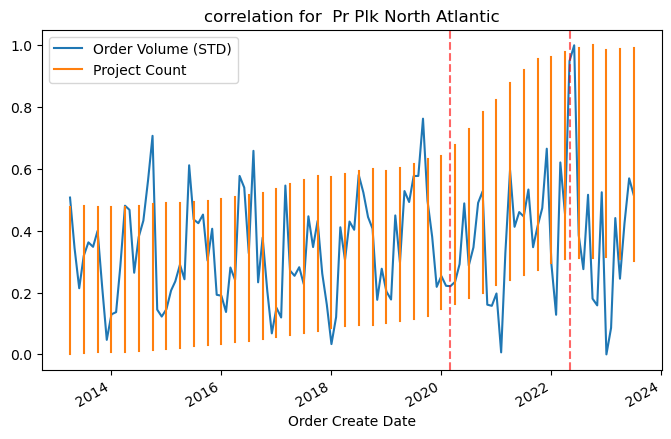

In [256]:

print((merge_df.loc[merge_df['Region Name']==region].corr()),region)
ax=merge_df.loc[merge_df['Region Name']==region].set_index('Order Create Date')[['Order Volume (STD)','Project Count']].apply(lambda x:(x-x.min())/(x.max()-x.min())).plot(figsize=(8,5),title=f'correlation for  {forecast_group} {region}')
ax.axvline(x='2020-03-01',color='red', alpha = 0.6,linestyle='dashed')
ax.axvline(x='2022-05-01',color='red', alpha = 0.6,linestyle='dashed')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Adjust the rotation angle as needed
plt.show()

In [226]:
forecast_group

'Pr Plk'

                    Order Volume (STD)  Project Count
Order Volume (STD)            1.000000       0.084271
Project Count                 0.084271       1.000000 Midwest Central


/tmp/ipykernel_30626/1624156918.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_30626/1624156918.py:38: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.loc[merge_df['Region Name']==region].corr()),region)


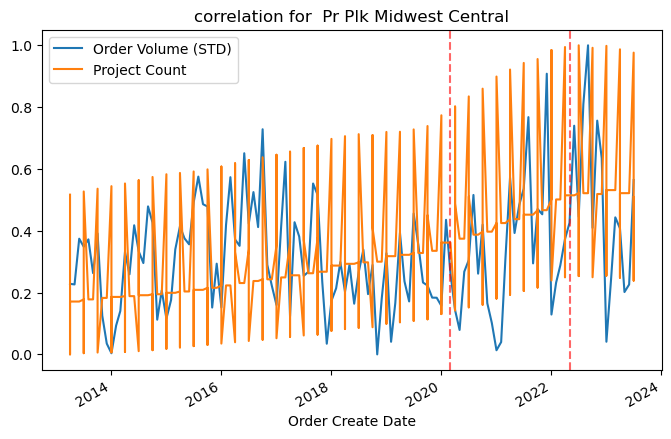

/tmp/ipykernel_30626/1624156918.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'


ValueError: You are trying to merge on object and float64 columns. If you wish to proceed you should use pd.concat

In [257]:
forecast_group='C+ Dr NT3'
rr_data=pd.read_csv('r&r.csv')

rr_data=rr_data.drop(['District','District Number','Sub Division','Division'],axis=1)
rr_data['Order Create Date']=pd.to_datetime(rr_data['Calendar Year'])
# region='Midwest Central'
for i in rr_data['Region Name'].unique():
       region=i
       rr_data=rr_data.loc[rr_data['Region Name']==region]
       start_date = "1999-01-01"
       end_date = "2024-01-01"
       date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
       rr_df_date=pd.DataFrame()
       rr_df_date['Order Create Date']=date_range
       rr_data=rr_df_date.merge(rr_data,how='left',on=['Order Create Date'])
       rr_data['Project Count']=rr_data['Project Count']/3
       rr_data['Project Count'].fillna(method='ffill',inplace=True)
       rr_data['Region Name'].fillna(method='ffill',inplace=True)
       rr_data['Calendar Year'].fillna(method='ffill',inplace=True)
       rr_data['District Name'].fillna(method='ffill',inplace=True)
       order_df=pd.read_parquet('tezcatli_orders_data.parquet')
       order_df['Order Create Date']=pd.to_datetime(order_df['Order Create Date'])
       order_df=order_df.loc[order_df['Region Name']!='Export/Interco']
       order_df=order_df.loc[order_df['Product Segment'].isin(['Exterior','Interior'])]
       order_df=order_df[[ 'Order Create Date',
       'Region Name', 'District Name', 'forecast_group', 'Order Volume (STD)']]
       forecast_group='Pr Plk'
       order_df=order_df[order_df['Region Name']==region]
       order_df['year'] = order_df['Order Create Date'].dt.year
       order_df['month'] = order_df['Order Create Date'].dt.month
       order_df=order_df.sort_values(by='Order Create Date').reset_index(drop=True)
       order_df_filter=order_df.loc[order_df['forecast_group']==forecast_group]
       # order_df_filter=order_df_filter.groupby(['Calendar Year','Region Name','District Name'])['Order Volume (STD)'].sum().reset_index()
       order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
       order_df_filter=order_df_filter.groupby(['date','Region Name'])['Order Volume (STD)'].sum().reset_index()
       order_df_filter['Order Create Date']=pd.to_datetime(order_df_filter['date'])
       merge_df=order_df_filter.merge(rr_data,how='left',on=['Order Create Date','Region Name'])
       print((merge_df.loc[merge_df['Region Name']==region].corr()),region)
       ax=merge_df.loc[merge_df['Region Name']==region].set_index('Order Create Date')[['Order Volume (STD)','Project Count']].apply(lambda x:(x-x.min())/(x.max()-x.min())).plot(figsize=(8,5),title=f'correlation for  {forecast_group} {region}')
       ax.axvline(x='2020-03-01',color='red', alpha = 0.6,linestyle='dashed')
       ax.axvline(x='2022-05-01',color='red', alpha = 0.6,linestyle='dashed')
       # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Adjust the rotation angle as needed
       plt.show()